# Matplotlib Assignment

# Scipy:
###### We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
### Task:
###### 1.fitting it to the periodic function
###### 2.plot the fit
###### Data:
  Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
  
  Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


In [17]:
import pylab as py
import numpy as np

In [19]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]

Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [24]:
maxi=np.array(Max)
maxi

array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])

In [25]:
mini=np.array(Min)
mini

array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

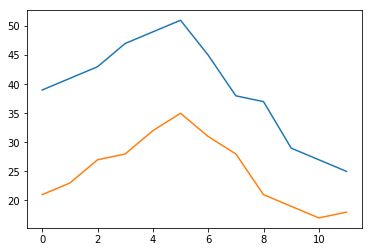

In [31]:
py.plot(maxi)

py.plot(mini)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## This assignment is for visualization using matplotlib:
### data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)
Charts to plot:
###### 1. Create a pie chart presenting the male/female proportion
###### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [2]:
#url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv' , usecols=['sex','age','fare'])

In [3]:
titanic.head()

,sex,age,fare
0,female,29.0000,211.3375
1,male,0.9167,151.5500
2,female,2.0000,151.5500
3,male,30.0000,151.5500
4,female,25.0000,151.5500


In [4]:
s=[titanic['sex'].value_counts()[0],titanic['sex'].value_counts()[1]]  #taking count values of gender
s

[843, 466]

In [5]:
labels=titanic['sex'].value_counts().index  #labels in genders
labels

Index(['male', 'female'], dtype='object')

([<matplotlib.patches.Wedge at 0x1e83eb28be0>,
 [Text(-0.524549206046674, 1.079281302736133, 'male'),
  Text(0.48083667958064136, -0.9893412391939719, 'female')],
 [Text(-0.30598703686055984, 0.6295807599294108, '64.4%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.6%')])

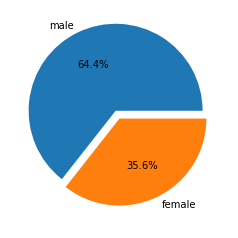

In [6]:
plt.pie(s,labels=labels, autopct='%1.1f%%',explode=(0.1,0))  #pie chart

###### 2.Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [7]:
titanic.isnull().sum() #chcking no of missing values

sex       1
age     264
fare      2
dtype: int64

(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <a list of 10 Patch objects>)

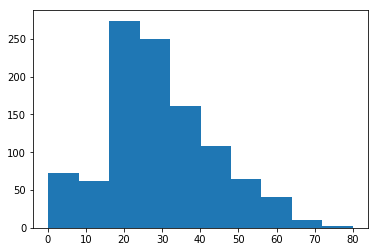

In [9]:
plt.hist(titanic['age']) 

In [10]:
#applying RANDOM SAMPLE IMPUTATION method to replace the missing values
titanic['Age_random']=titanic['age']
random_sample=titanic['age'].dropna().sample(titanic['age'].isnull().sum())
random_sample.index=titanic[titanic['age'].isnull()].index
titanic.loc[titanic['age'].isnull(), 'Age_random']= random_sample
titanic.head()

,sex,age,fare,Age_random
0,female,29.0000,211.3375,29.0000
1,male,0.9167,151.5500,0.9167
2,female,2.0000,151.5500,2.0000
3,male,30.0000,151.5500,30.0000
4,female,25.0000,151.5500,25.0000


(array([ 85.,  71., 355., 311., 203., 135.,  83.,  52.,  11.,   4.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <a list of 10 Patch objects>)

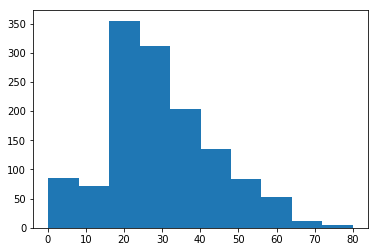

In [11]:
plt.hist(titanic['Age_random'])

In [12]:
print(titanic['age'].mean(),titanic['Age_random'].mean())   #checking the Distortion

29.8811345124283 29.996056030534355


In [13]:
x=titanic[titanic['sex']=='male']    #separating Male table
x.head() 


,sex,age,fare,Age_random
1,male,0.9167,151.5500,0.9167
3,male,30.0000,151.5500,30.0000
5,male,48.0000,26.5500,48.0000
7,male,39.0000,0.0000,39.0000
9,male,71.0000,49.5042,71.0000


In [14]:
y=titanic[titanic['sex']=='female']    #Separating Female table
y.head()

,sex,age,fare,Age_random
0,female,29.0,211.3375,29.0
2,female,2.0,151.5500,2.0
4,female,25.0,151.5500,25.0
6,female,63.0,77.9583,63.0
8,female,53.0,51.4792,53.0


Text(0, 0.5, 'age')

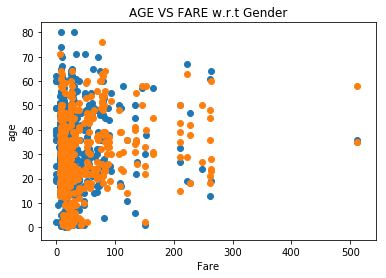

In [15]:
plt.scatter(x['fare'],x['Age_random'])      #Scatter plot (AGE VS FARE with respect to gender)
plt.scatter(y['fare'],y['Age_random'])
plt.title('AGE VS FARE w.r.t Gender')
plt.xlabel('Fare')
plt.ylabel('age')